In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
GRVTY = 9.8 # gravity constant at 9.8 ms-2

# calculate horizontal distance travelled after t seconds, with initial velocity v0, and deg shoot angle
def horiz_dist(v0,t,deg):
    tmax = ground_t(v0,deg)
    rad = np.radians(deg) 
    v_horiz = v0 * np.cos(rad)
    if t <= tmax:        
        dist = v_horiz * t
    else:
        dist = v_horiz * tmax
    return dist

# calculate vertical distance to earth after t seconds, with initial velocity v0, and deg shoot angle
def vert_dist(v0,t,deg):
    rad = np.radians(deg) 
    v_vert = v0 * np.sin(rad)
    h = v_vert * t - (0.5 * GRVTY * t * t)
    if h >= 0:  
        return h
    else:
        return 0

# calculate projectile airtime
def ground_t(v0,deg):
    rad = np.radians(deg) 
    v_vert = v0 * np.sin(rad)
    t = 2 * v_vert / GRVTY
    return t

In [3]:
v0 = 25
degs = [30,45,60]
t_grounds = [ground_t(v0,d) for d in degs] # calculate airtime for all angles
t_ground = max(t_grounds)

time_interval = 0.1 # distance between each point in time used for calculation in seconds
t_steps = np.arange(0,t_ground+time_interval,time_interval) # produce list of calculation times based on time_interval
# create list of horizontal position in each given time for each angle
hls = [[horiz_dist(v0,t,d) for t in t_steps] for d in degs] 

# create list of vertical position in each given time for each angle
vls = [[vert_dist(v0,t,d) for t in t_steps] for d in degs] 

h_max = max([ max(l) for l in hls]) # find maximum horizontal distance
h_max = np.ceil(h_max)
v_max = max([ max(l) for l in vls]) # find maximum vertical distance
v_max = np.ceil(v_max)


max airtime: 4.41849695808387


<IPython.core.display.Javascript object>


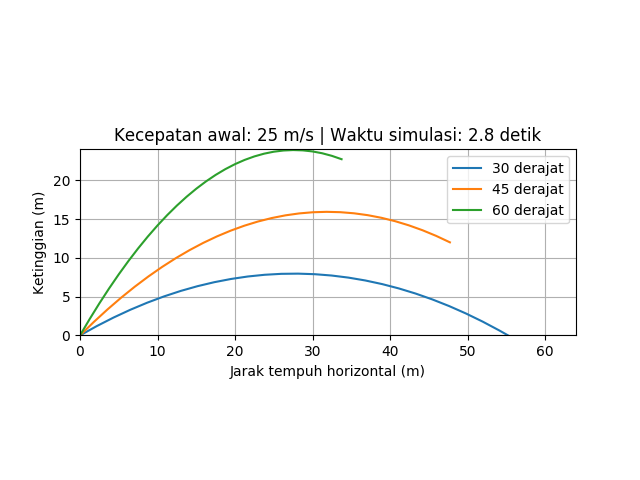

In [31]:
fig, ax = plt.subplots()

plt.gca().set_aspect("equal") # equal scale on x axis and y axis 
plt.xlabel('Jarak tempuh horizontal (m)') # title for x axis
plt.ylabel('Ketinggian (m)') # title for y axis
plt.grid(True, which='both') # display grid for better view
   
lines = [ax.plot([],[],label='{} derajat'.format(d))[0] for d in degs] # create plot for each angle
ax.axis([0,h_max,0,v_max]) # set plot axis range
ax.legend()

def update(num,lines):
    for i in range(len(lines)):
        l = lines[i]
        l.set_data(hls[i][:num], vls[i][:num])
    tm = np.round(num * time_interval,1)
    plt.title('Kecepatan awal: {} m/s | Waktu simulasi: {} detik'.format(v0,tm))
    return lines

ani = animation.FuncAnimation(fig, update, frames=len(t_steps),fargs=[lines],interval=1000*time_interval)

ani.save('gifs/projectile-multi.gif', writer='imagemagick', fps=1/time_interval)

# FFwriter = animation.FFMpegWriter(fps=10)
# ani.save('anim/projectile.mp4', writer=FFwriter)